Please download the dataset from the below url

In [ ]:
import splitfolders
splitfolders.ratio('SimpleDataset/color', output="output", seed=1337, ratio=(.8, .2), group_prefix=None)

Copying files: 54305 files [07:32, 119.95 files/s]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/ColabNotebooks/output (2).zip' -d /content/drive/MyDrive/ColabNotebooks/

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.xception import Xception
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/ColabNotebooks/output/train'
valid_path = '/content/drive/MyDrive/ColabNotebooks/output/test'


In [ ]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/ColabNotebooks/output/train/*')

In [ ]:
folders

['/content/drive/MyDrive/ColabNotebooks/output/train/Tomato___Bacterial_spot',
 '/content/drive/MyDrive/ColabNotebooks/output/train/Tomato___Early_blight',
 '/content/drive/MyDrive/ColabNotebooks/output/train/Tomato___healthy',
 '/content/drive/MyDrive/ColabNotebooks/output/train/Tomato___Late_blight',
 '/content/drive/MyDrive/ColabNotebooks/output/train/Tomato___Leaf_Mold',
 '/content/drive/MyDrive/ColabNotebooks/output/train/Tomato___Septoria_leaf_spot',
 '/content/drive/MyDrive/ColabNotebooks/output/train/Tomato___Spider_mites Two-spotted_spider_mite',
 '/content/drive/MyDrive/ColabNotebooks/output/train/Tomato___Target_Spot',
 '/content/drive/MyDrive/ColabNotebooks/output/train/Tomato___Tomato_mosaic_virus',
 '/content/drive/MyDrive/ColabNotebooks/output/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus']

In [ ]:
len(folders)

10

In [ ]:
xception = Xception(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
for layer in xception.layers:
    layer.trainable = False
    

In [ ]:
from keras import layers
from keras.layers import Dense, Input, BatchNormalization, Activation
from keras.layers import Conv2D, SeparableConv2D, MaxPooling2D, GlobalAveragePooling2D, GlobalMaxPooling2D


In [ ]:
vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


# don't train existing weights
for layer in vgg16.layers:
    layer.trainable = False

In [ ]:
x = Conv2D(32, (3, 3), strides=(2, 2), use_bias=False)(vgg16.output)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(64, (3, 3), use_bias=False)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

residual = Conv2D(128, (1, 1), strides=(2, 2), padding='same', use_bias=False)(x)
residual = BatchNormalization()(residual)

# Block 2
x = SeparableConv2D(128, (3, 3), padding='same', use_bias=False)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = SeparableConv2D(128, (3, 3), padding='same', use_bias=False)(x)
x = BatchNormalization()(x)

# Block 2 Pool
x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
x = layers.add([x, residual])

residual = Conv2D(256, (1, 1), strides=(2, 2), padding='same', use_bias=False)(x)
residual = BatchNormalization()(residual)

# Block 3
x = Activation('relu')(x)
x = SeparableConv2D(256, (3, 3), padding='same', use_bias=False)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = SeparableConv2D(256, (3, 3), padding='same', use_bias=False)(x)
x = BatchNormalization()(x)

# Block 3 Pool
x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
x = layers.add([x, residual])

residual = Conv2D(728, (1, 1), strides=(2, 2), padding='same', use_bias=False)(x)
residual = BatchNormalization()(residual)

# Block 4
x = Activation('relu')(x)
x = SeparableConv2D(728, (3, 3), padding='same', use_bias=False)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3, 3), padding='same', use_bias=False)(x)
x = BatchNormalization()(x)

x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
x = layers.add([x, residual])

# Block 5 - 12
for i in range(8):
  residual = x

  x = Activation('relu')(x)
  x = SeparableConv2D(728, (3, 3), padding='same', use_bias=False)(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  x = SeparableConv2D(728, (3, 3), padding='same', use_bias=False)(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  x = SeparableConv2D(728, (3, 3), padding='same', use_bias=False)(x)
  x = BatchNormalization()(x)

  x = layers.add([x, residual])

residual = Conv2D(1024, (1, 1), strides=(2, 2), padding='same', use_bias=False)(x)
residual = BatchNormalization()(residual)

# Block 13
x = Activation('relu')(x)
x = SeparableConv2D(728, (3, 3), padding='same', use_bias=False)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = SeparableConv2D(1024, (3, 3), padding='same', use_bias=False)(x)
x = BatchNormalization()(x)

# Block 13 Pool
x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
x = layers.add([x, residual])

# Block 14
x = SeparableConv2D(1536, (3, 3), padding='same', use_bias=False)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

# Block 14 part 2
x = SeparableConv2D(2048, (3, 3), padding='same', use_bias=False)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

In [ ]:
x = Flatten()(x)

In [ ]:


prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg19.input, outputs=prediction)




In [ ]:

# view the structure of the model
model.summary()


Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 224, 224, 64  1792        ['input_11[0][0]']               
                                )                                                                 
                                                                                                  
 block1_conv2 (Conv2D)          (None, 224, 224, 64  36928       ['block1_conv1[0][0]']           
                                )                                                           

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=[tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.AUC(),tf.keras.metrics.Precision(),tf.keras.metrics.Recall(),tf.keras.metrics.TrueNegatives(),tf.keras.metrics.TruePositives(),tf.keras.metrics.FalsePositives(),tf.keras.metrics.FalseNegatives()]
)


In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/ColabNotebooks/output/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 14523 images belonging to 10 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/ColabNotebooks/output/val',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 3637 images belonging to 10 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=1,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

In [ ]:
import matplotlib.pylab as plt
r.history

{'auc': [0.9713299870491028,
  0.9897470474243164,
  0.9932546615600586,
  0.9939835667610168,
  0.9945647120475769,
  0.9952046275138855,
  0.996002733707428,
  0.9956589937210083,
  0.9968019127845764,
  0.9967836737632751],
 'categorical_accuracy': [0.78654545545578,
  0.8772980570793152,
  0.9033257365226746,
  0.9128968119621277,
  0.9198512434959412,
  0.9276320338249207,
  0.9336913824081421,
  0.9352750778198242,
  0.9468429684638977,
  0.950905442237854],
 'false_negatives': [3916.0,
  2066.0,
  1617.0,
  1390.0,
  1264.0,
  1139.0,
  1055.0,
  1013.0,
  841.0,
  764.0],
 'false_positives': [1743.0,
  1329.0,
  1120.0,
  1051.0,
  967.0,
  906.0,
  827.0,
  830.0,
  693.0,
  641.0],
 'loss': [0.6707809567451477,
  0.3693074584007263,
  0.2871822714805603,
  0.2595498859882355,
  0.2371833324432373,
  0.2194279432296753,
  0.19570472836494446,
  0.19745373725891113,
  0.15904872119426727,
  0.1483570635318756],
 'precision': [0.8588663935661316,
  0.9035978317260742,
  0.920148

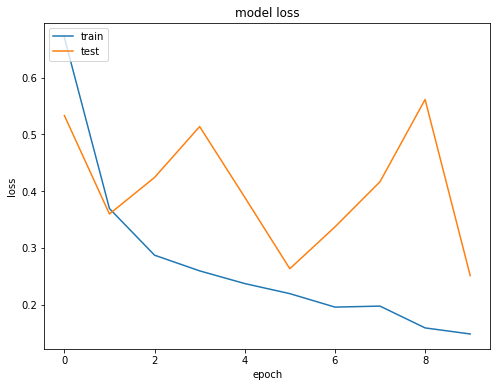

In [ ]:

from matplotlib.pyplot import figure
figure(figsize=(8, 6))
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


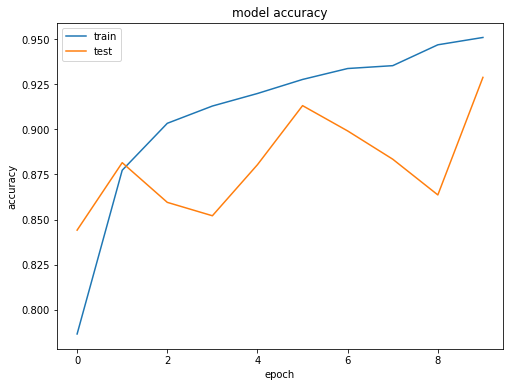

In [ ]:

# plot the accuracy
figure(figsize=(8, 6))
plt.plot(r.history['categorical_accuracy'])
plt.plot(r.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

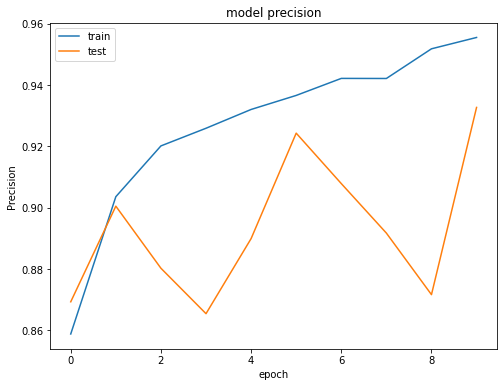

In [ ]:

# plot the accuracy
figure(figsize=(8, 6))
plt.plot(r.history['precision'])
plt.plot(r.history['val_precision'])
plt.title('model precision')
plt.ylabel('Precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

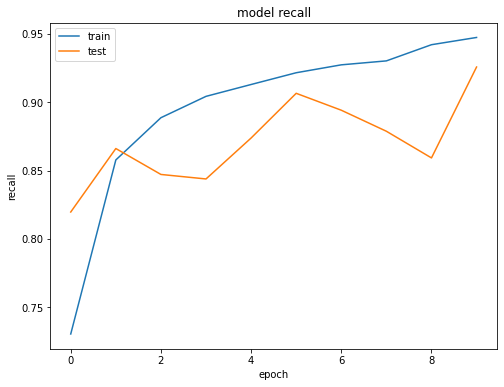

In [ ]:
figure(figsize=(8, 6))
plt.plot(r.history['recall'])
plt.plot(r.history['val_recall'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

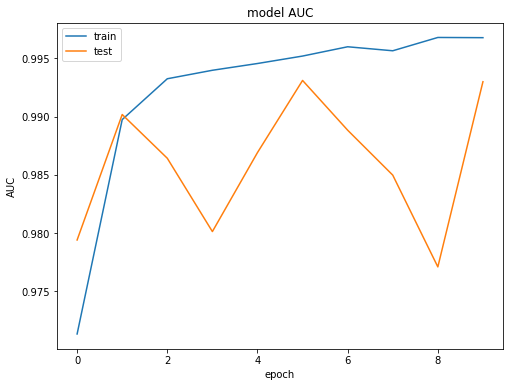

In [ ]:
figure(figsize=(8, 6))
plt.plot(r.history['auc'])
plt.plot(r.history['val_auc'])
plt.title('model AUC')
plt.ylabel('AUC')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

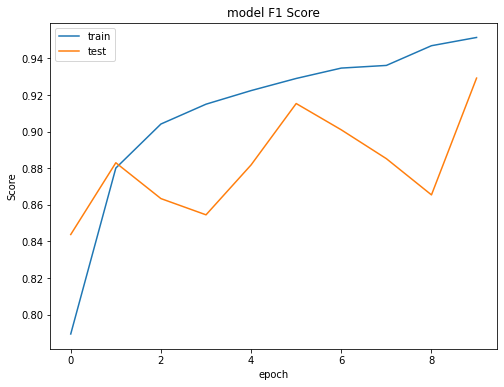

In [ ]:
f1_score=[]
val_f1_score=[]
for i in range(10):
  f1_score.append((2*r.history['precision'][i] * r.history['recall'][i])/(r.history['precision'][i] + r.history['recall'][i]))
  val_f1_score.append((2*r.history['val_precision'][i] * r.history['val_recall'][i])/(r.history['val_precision'][i] + r.history['val_recall'][i])) 

figure(figsize=(8, 6))
plt.plot(f1_score)
plt.plot(val_f1_score)
plt.title('model F1 Score')
plt.ylabel('Score')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:

print('Name     TN     FP     TP      FN')
for val in range(10):
  print(f"{val}    {r.history['true_negatives'][val]} {r.history['false_positives'][val]} {r.history['true_positives'][val]}   {r.history['false_negatives'][val]}")

print('\n')
print('Name     TN     FP      TP      FN')
for val in range(10):
  print(f"{val}    {r.history['val_true_negatives'][val]} {r.history['val_false_positives'][val]} {r.history['val_true_positives'][val]}   {r.history['val_false_negatives'][val]}")
  

Name     TN     FP     TP      FN
0    128964.0 1743.0 10607.0   3916.0
1    129378.0 1329.0 12457.0   2066.0
2    129587.0 1120.0 12906.0   1617.0
3    129656.0 1051.0 13133.0   1390.0
4    129740.0 967.0 13259.0   1264.0
5    129801.0 906.0 13384.0   1139.0
6    129880.0 827.0 13468.0   1055.0
7    129877.0 830.0 13510.0   1013.0
8    130014.0 693.0 13682.0   841.0
9    130066.0 641.0 13759.0   764.0


Name     TN     FP      TP      FN
0    32285.0 448.0 2981.0   656.0
1    32385.0 348.0 3150.0   487.0
2    32314.0 419.0 3081.0   556.0
3    32256.0 477.0 3069.0   568.0
4    32340.0 393.0 3178.0   459.0
5    32463.0 270.0 3297.0   340.0
6    32403.0 330.0 3252.0   385.0
7    32345.0 388.0 3196.0   441.0
8    32273.0 460.0 3125.0   512.0
9    32490.0 243.0 3367.0   270.0


In [ ]:
# save it as a h5 file
from tensorflow.keras.models import load_model

model.save('/content/drive/MyDrive/ColabNotebooks/model_vgg16.h5')

In [ ]:

y_pred = model.predict(training_set)


In [ ]:
y_pred

array([[9.7594190e-01, 6.4871991e-03, 4.2272510e-04, 1.7148238e-02],
       [9.9938118e-01, 8.6601387e-05, 3.2729688e-04, 2.0490818e-04],
       [2.3492565e-02, 6.3784618e-04, 2.3015366e-04, 9.7563952e-01],
       ...,
       [5.9526311e-03, 9.9352646e-01, 1.5324376e-04, 3.6766563e-04],
       [1.9066084e-02, 2.9304210e-02, 2.2898390e-04, 9.5140064e-01],
       [5.1401998e-03, 9.8183732e-03, 9.7884554e-03, 9.7525305e-01]],
      dtype=float32)

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([0, 0, 3, ..., 1, 3, 3], dtype=int64)

In [ ]:
#prediction = model.predict_generator(test_set)
true_class = training_set.classes
class_label = list(training_set.class_indices.keys())

In [ ]:
true_class

array([0, 0, 0, ..., 3, 3, 3])

In [ ]:
from sklearn import metrics
predicted_classes = y_pred

report = metrics.classification_report(true_class, predicted_classes, target_names=class_label)
print(metrics.accuracy_score(true_class , predicted_classes)*100)
print(report)    

36.35646687697161
                          precision    recall  f1-score   support

      Apple___Apple_scab       0.20      0.20      0.20       504
       Apple___Black_rot       0.21      0.21      0.21       496
Apple___Cedar_apple_rust       0.11      0.11      0.11       220
         Apple___healthy       0.53      0.52      0.53      1316

                accuracy                           0.36      2536
               macro avg       0.26      0.26      0.26      2536
            weighted avg       0.37      0.36      0.36      2536



In [ ]:
confusion_matrix = metrics.confusion_matrix(y_true=true_class, y_pred=y_pred)
confusion_matrix

array([[103,  94,  45, 262],
       [102, 106,  40, 248],
       [ 47,  48,  24, 101],
       [275, 249, 103, 689]], dtype=int64)

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_resnet50.h5')

In [ ]:
img_data

array([[[[ 6.7060997e+01,  5.4221001e+01,  4.7320000e+01],
         [ 6.9060997e+01,  5.6221001e+01,  4.9320000e+01],
         [ 7.3060997e+01,  6.0221001e+01,  5.3320000e+01],
         ...,
         [ 7.4060997e+01,  5.6221001e+01,  4.6320000e+01],
         [ 5.5060997e+01,  3.7221001e+01,  2.7320000e+01],
         [ 4.1060997e+01,  2.3221001e+01,  1.3320000e+01]],

        [[ 7.5060997e+01,  6.2221001e+01,  5.5320000e+01],
         [ 7.8060997e+01,  6.5221001e+01,  5.8320000e+01],
         [ 8.1060997e+01,  6.8221001e+01,  6.1320000e+01],
         ...,
         [ 9.7060997e+01,  7.9221001e+01,  6.9320000e+01],
         [ 7.3060997e+01,  5.5221001e+01,  4.5320000e+01],
         [ 4.9060997e+01,  3.1221001e+01,  2.1320000e+01]],

        [[ 8.7060997e+01,  7.4221001e+01,  6.7320000e+01],
         [ 9.0060997e+01,  7.7221001e+01,  7.0320000e+01],
         [ 9.3060997e+01,  8.0221001e+01,  7.3320000e+01],
         ...,
         [ 1.0106100e+02,  8.3221001e+01,  7.3320000e+01],
         [

In [ ]:
img=image.load_img('Datasets/Test/Coffee/download (2).jpg',target_size=(224,224))



In [ ]:
x=image.img_to_array(img)
x

array([[[254., 254., 254.],
        [254., 254., 254.],
        [254., 254., 254.],
        ...,
        [254., 254., 254.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[254., 254., 254.],
        [254., 254., 254.],
        [254., 254., 254.],
        ...,
        [254., 254., 254.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[254., 254., 254.],
        [254., 254., 254.],
        [254., 254., 254.],
        ...,
        [254., 254., 254.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x/255

In [ ]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

array([[0.9745471, 0.0254529]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

In [ ]:
a==1

array([ True])